In [1]:
print('Hi')

Hi


In [2]:
%pwd

'/Users/mccagheylab/Hsuan_Fu/Jupyter_note/DnaFeaturesViewer_script'

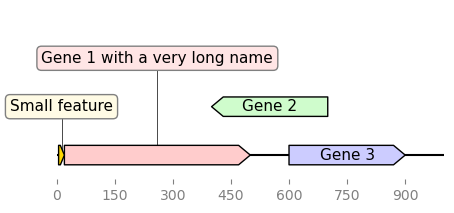

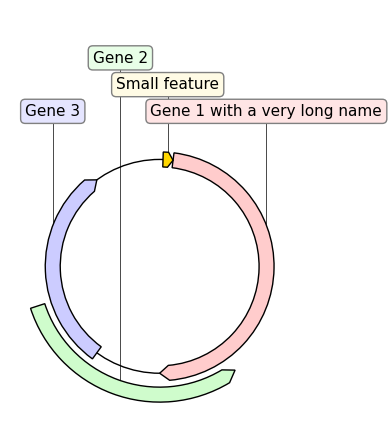

In [3]:
"""Simple example where a few features are defined "by hand" and are displayed
and exported as PNG, first with a linear view, then with a circular
view.
"""

from dna_features_viewer import (
    GraphicFeature,
    GraphicRecord,
    CircularGraphicRecord,
)

features = [
    GraphicFeature(
        start=5, end=20, strand=+1, color="#ffd700", label="Small feature"
    ),
    GraphicFeature(
        start=20,
        end=500,
        strand=+1,
        color="#ffcccc",
        label="Gene 1 with a very long name",
    ),
    GraphicFeature(
        start=400, end=700, strand=-1, color="#cffccc", label="Gene 2"
    ),
    GraphicFeature(
        start=600, end=900, strand=+1, color="#ccccff", label="Gene 3"
    ),
]


# PLOT AND EXPORT A LINEAR VIEW OF THE CONSTRUCT
record = GraphicRecord(sequence_length=1000, features=features)
ax, _ = record.plot(figure_width=5)
ax.figure.savefig("graphic_record_defined_by_hand.png")


# PLOT AND EXPORT A CIRCULAR VIEW OF THE CONSTRUCT
circular_rec = CircularGraphicRecord(sequence_length=1000, features=features)
ax2, _ = circular_rec.plot(figure_width=4)
ax2.figure.tight_layout()
ax2.figure.savefig(
    "graphic_record_defined_by_hand_circular.png", bbox_inches="tight"
)


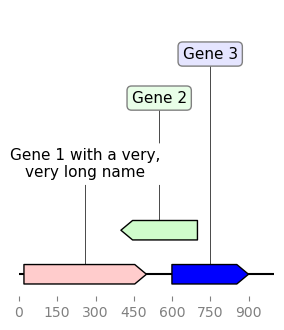

In [4]:
from matplotlib import rc_context
from dna_features_viewer import GraphicFeature, GraphicRecord

rc_context(
    {
        "font.family": ["Walter Turncoat"],
        "path.sketch": (1.5, 300, 1),  # scale, length, randomness
    }
)

features = [
    GraphicFeature(
        start=20,
        end=500,
        strand=+1,
        color="#ffcccc",
        label="Gene 1 with a very, very long name",
        box_linewidth=0,
        box_color='white'
    ),
    GraphicFeature(
        start=400, end=700, strand=-1, color="#cffccc", label="Gene 2"
    ),
    GraphicFeature(
        start=600, end=900, strand=+1, color="#0000ff", label="Gene 3"
    )
]

record = GraphicRecord(sequence_length=1000, features=features)

ax, _ = record.plot(figure_width=3)
ax.figure.tight_layout()
ax.figure.savefig("cartoon_style.png", dpi=200)

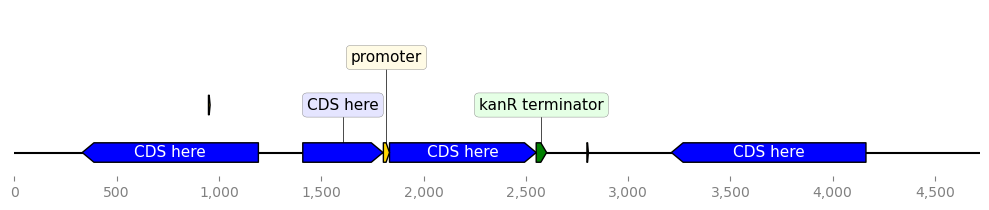

In [5]:
from dna_features_viewer import BiopythonTranslator

class MyCustomTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in blue, all other features in gold.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites.
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """

    def compute_feature_color(self, feature):
        if feature.type == "CDS":
            return "blue"
        elif feature.type == "terminator":
            return "green"
        else:
            return "gold"

    def compute_feature_label(self, feature):
        if feature.type == 'restriction_site':
            return None
        elif feature.type == "CDS":
            return "CDS here"
        else:
            return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        """Do not display promoters. Just because."""
        return [
            feature for feature in features
            if (feature.type != "restriction_site")
            or ("BamHI" in str(feature.qualifiers.get("label", '')))
        ]


graphic_record = MyCustomTranslator().translate_record("example_sequence.gb")
ax, _ = graphic_record.plot(figure_width=10)
ax.figure.tight_layout()
ax.figure.savefig("custom_biopython_translator.png")

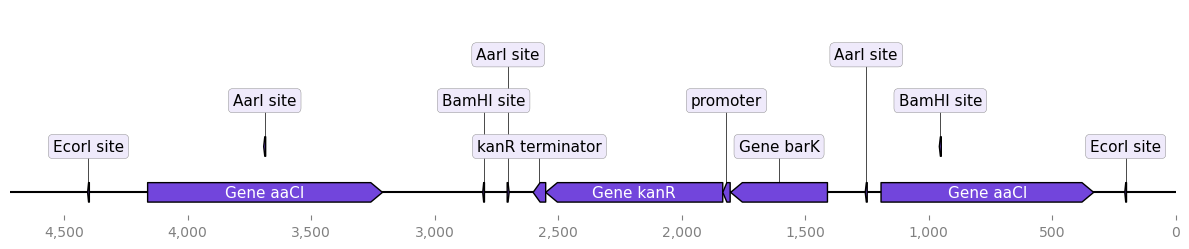

In [6]:
"""This example shows how you can very easily flip a plot horizontally if you
need, using Matplotlib's ax.set_xlim() method."""

from dna_features_viewer import BiopythonTranslator

ax = BiopythonTranslator.quick_class_plot("example_sequence.gb")
x1, x2 = ax.get_xlim()
ax.set_xlim(x2, x1)
ax.figure.tight_layout()
ax.figure.savefig("example_with_inverted_x_axis.png")


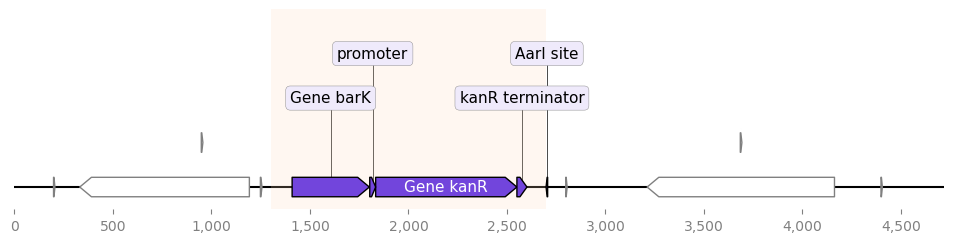

In [7]:
from dna_features_viewer import BiopythonTranslator

start, end = 1300, 2700


def feature_properties(f):
    """Fade away all features not overlapping with [start, end]"""
    if f.location.end < start or f.location.start > end:
        return dict(color="white", linecolor="grey", label=None)
    return {}


translator = BiopythonTranslator(features_properties=feature_properties)
graphic_record = translator.translate_record("example_sequence.gb")
ax, _ = graphic_record.plot(figure_width=12, elevate_outline_annotations=True)
ax.fill_between(
    [start, end], -10, 10, facecolor="peachpuff", alpha=0.2, zorder=-1
)

ax.figure.savefig('locally_highlighted_record.png', bbox_inches='tight')


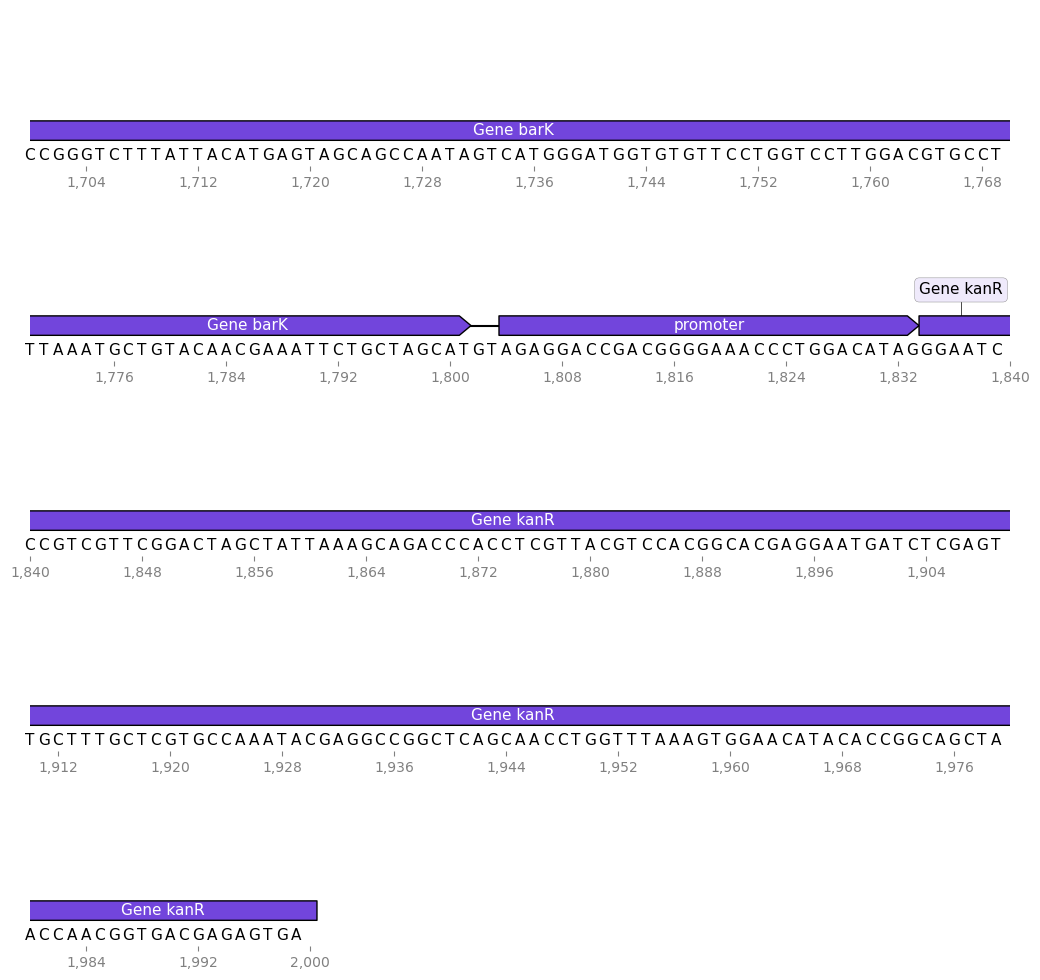

In [8]:
"""In this example we plot a record fragment with sequence over multiple lines.
"""
from dna_features_viewer import BiopythonTranslator

translator = BiopythonTranslator()
graphic_record = translator.translate_record("example_sequence.gb")
subrecord = graphic_record.crop((1700, 2000))
fig, axes = subrecord.plot_on_multiple_lines(
    nucl_per_line=70, plot_sequence=True
)
fig.savefig("multiline_plot.png")


In [9]:
"""In this example we plot a record fragment with sequence over multiple lines.
"""
from dna_features_viewer import BiopythonTranslator


class CustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        return {
            "restriction_site": "yellow",
            "CDS": "orange",
            "promoter": "darkblue",
            "terminator": "lightblue",
        }[feature.type]


translator = CustomTranslator()
graphic_record = translator.translate_record("example_sequence.gb")
subrecord = graphic_record.crop((1800, 2750))
subrecord.plot_on_multiple_pages(
    "multipage_plot.pdf",
    nucl_per_line=70,
    lines_per_page=7,
    plot_sequence=True,
)


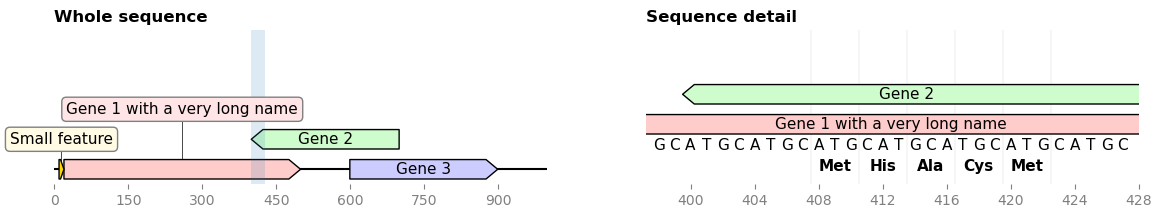

In [10]:
"""Generate a 2-plot figure with full sequence on the left,
detail of a sub-segment on the right."""

from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt

record = GraphicRecord(sequence=250 * "ATGC", features=[
    GraphicFeature(start=10, end=20, strand=+1, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
                   label="Gene 2"),
    GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
                   label="Gene 3")
])
zoom_start, zoom_end = 398, 428  # coordinates of the "detail"
cropped_record = record.crop((zoom_start, zoom_end))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2))

# PLOT THE WHOLE SEQUENCE

ax1.set_title("Whole sequence", loc='left', weight='bold')
record.plot(ax=ax1)
ax1.fill_between((zoom_start, zoom_end), +1000, -1000, alpha=0.15)

# PLOT THE SEQUENCE DETAILS


cropped_record.plot_translation(ax=ax2, location=(408, 423),
                                fontdict={'weight': 'bold'})
cropped_record.plot(ax=ax2, plot_sequence=True)
ax2.set_title("Sequence detail", loc='left', weight='bold')

fig.savefig('overview_and_detail.png', bbox_inches='tight')


In [11]:
"""Simple example with Bokeh output. Requires the Bokeh library installed.
"""

from dna_features_viewer import BiopythonTranslator
from bokeh.resources import CDN
from bokeh.embed import file_html

record = BiopythonTranslator().translate_record(record="example_sequence.gb")
plot = record.plot_with_bokeh(figure_width=8)

with open("plot_with_bokeh.html", "w+") as f:
    f.write(file_html(plot, CDN, "Example Sequence"))


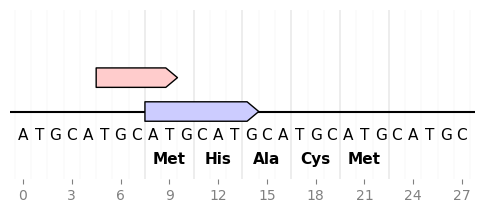

In [12]:
from dna_features_viewer import GraphicFeature, GraphicRecord

record = GraphicRecord(sequence="ATGCATGCATGCATGCATGCATGCATGC", features=[
    GraphicFeature(start=5, end=10, strand=+1, color='#ffcccc'),
    GraphicFeature(start=8, end=15, strand=+1, color='#ccccff')
])

ax, _ = record.plot(figure_width=6)
record.plot_sequence(ax, guides_intensity=0.2)
fontdict = {'weight': 'bold'}
record.plot_translation(ax, (8, 23), fontdict=fontdict, guides_intensity=0.8)
ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')


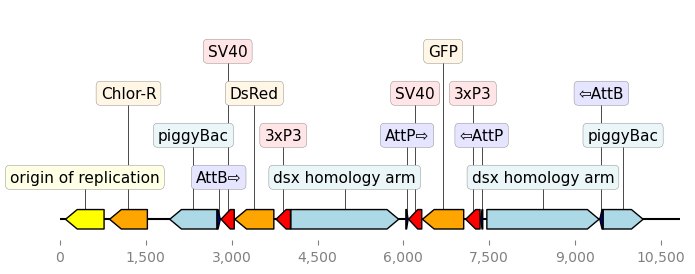

In [13]:
"""An example with GIF generation at the end. How cool is that!

This example requires the Moviepy library  installed (pip install moviepy).

"""
from Bio import Entrez, SeqIO
from dna_features_viewer import BiopythonTranslator

# DOWNLOAD THE PLASMID's RECORD FROM NCBI
Entrez.email = "zulko@egf.org"
handle = Entrez.efetch(
    db="nucleotide", id=1473096477, rettype="gb", retmode="text"
)
record = SeqIO.read(handle, "genbank")

# CREATE THE GRAPHIC RECORD WITH DNA_FEATURES_VIEWER

color_map = {
    "rep_origin": "yellow",
    "CDS": "orange",
    "regulatory": "red",
    "misc_recomb": "darkblue",
    "misc_feature": "lightblue",
}
translator = BiopythonTranslator(
    features_filters=(lambda f: f.type not in ["gene", "source"],),
    features_properties=lambda f: {"color": color_map.get(f.type, "white")},
)
translator.max_line_length = 15
graphic_record = translator.translate_record(record)
ax, _ = graphic_record.plot(figure_width=8, strand_in_label_threshold=7)
ax.figure.savefig("translator_with_custom_colors.png", bbox_inches="tight")



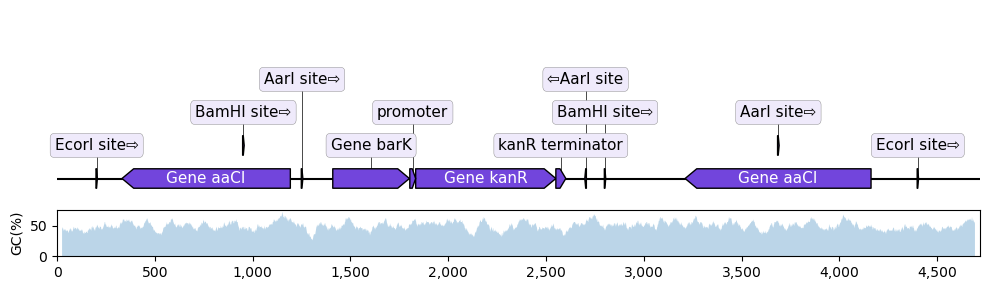

In [14]:
"""In this example we plot a record's annotations on top of the curve of the
local GC content in the record's sequence.
"""
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np


def plot_local_gc_content(record, window_size, ax):
    """Plot windowed GC content on a designated Matplotlib ax."""
    def gc_content(s):
        return 100.0 * len([c for c in s if c in "GC"]) / len(s)

    yy = [
        gc_content(record.seq[i : i + window_size])
        for i in range(len(record.seq) - window_size)
    ]
    xx = np.arange(len(record.seq) - window_size) + 25
    ax.fill_between(xx, yy, alpha=0.3)
    ax.set_ylim(bottom=0)
    ax.set_ylabel("GC(%)")


record = SeqIO.read("example_sequence.gb", "genbank")
translator = BiopythonTranslator()
graphic_record = translator.translate_record(record)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 3), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)
plot_local_gc_content(record, window_size=50, ax=ax2)

fig.tight_layout()  # Resize the figure to the right height
fig.savefig("with_gc_plot.png")
